In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpt


In [3]:
df=pd.read_csv(r"C:\Users\nishu\Downloads\Google_Stock_Price_Train.csv")

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range=(0,1))

In [11]:
ts = df.iloc[:, 1:2].values

In [12]:
training_set_scaled = sc.fit_transform(ts)

In [21]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [34]:
model = Sequential()

In [35]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [36]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 11s 78ms/step - loss: 0.0314
Epoch 2/50
38/38 [==============================] - 2s 62ms/step - loss: 0.0064
Epoch 3/50
38/38 [==============================] - 2s 51ms/step - loss: 0.0050
Epoch 4/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0053
Epoch 5/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0049
Epoch 6/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0045
Epoch 7/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0046
Epoch 8/50
38/38 [==============================] - 2s 51ms/step - loss: 0.0043
Epoch 9/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0049
Epoch 10/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0043
Epoch 11/50
38/38 [==============================] - 2s 48ms/step - loss: 0.0040
Epoch 12/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0045
Epoch 13/50
38/38 [=================

In [38]:
dataset_test = pd.read_csv(r"C:\Users\nishu\Downloads\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [44]:
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [46]:
import matplotlib.pyplot as plt

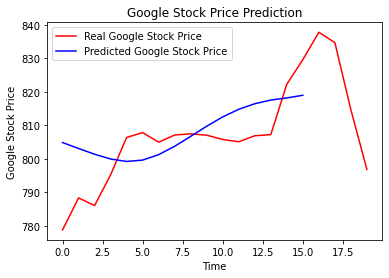

In [47]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()